# Quantum Phase Estimation (QPE) for H₂ — **Noiseless**

Uses PennyLane with harmonized project utilities

In [1]:
from qpe.core import run_qpe
from qpe.hamiltonian import build_hamiltonian
from qpe.io_utils import ensure_dirs, signature_hash, load_qpe_result, save_qpe_result
from qpe.visualize import plot_qpe_distribution, plot_qpe_sweep

ensure_dirs()

In [2]:
molecule_name = "H2"

H, n_qubits, hf_state, symbols, coordinates, basis, charge = build_hamiltonian(molecule_name)


In [3]:
n_ancilla = 4
t_evol = 1.0
trotter_steps = 2
shots = 1000

sig = signature_hash(
    molecule=molecule_name,
    n_ancilla=n_ancilla,
    t=t_evol,
    trotter_steps=trotter_steps,
    shots=shots,
    noise=None,
)

result = load_qpe_result(molecule_name, sig)
if result is None:
    result = run_qpe(
        hamiltonian=H,
        hf_state=hf_state,
        n_ancilla=n_ancilla,
        t=t_evol,
        trotter_steps=trotter_steps,
        noise_params=None,
        shots=shots,
        molecule_name=molecule_name,
    )
    save_qpe_result(result)


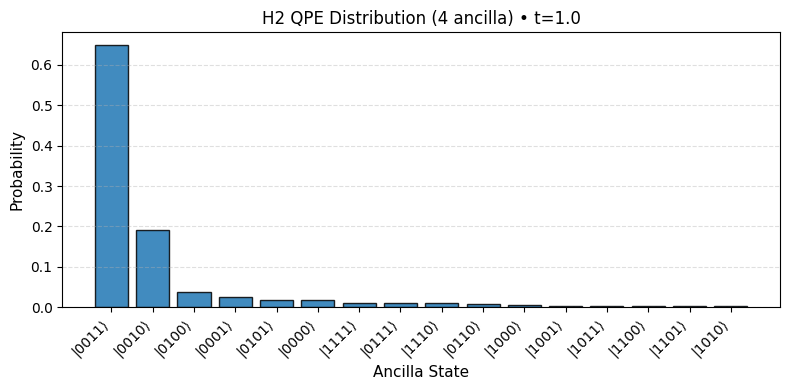

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/qpe/H2/distribution_ancilla4_t1.png
Most probable bitstring: 0011
Estimated phase: 0.187500
Estimated energy: -1.17809725 Ha
Hartree–Fock energy: -1.11668439 Ha
ΔE (QPE - HF): -0.06141286 Ha


In [4]:
plot_qpe_distribution(result, show=True, save=True)

print(f"Most probable bitstring: {result['best_bitstring']}")
print(f"Estimated phase: {result['phase']:.6f}")
print(f"Estimated energy: {result['energy']:.8f} Ha")
print(f"Hartree–Fock energy: {result['hf_energy']:.8f} Ha")
print(f"ΔE (QPE - HF): {result['energy'] - result['hf_energy']:+.8f} Ha")


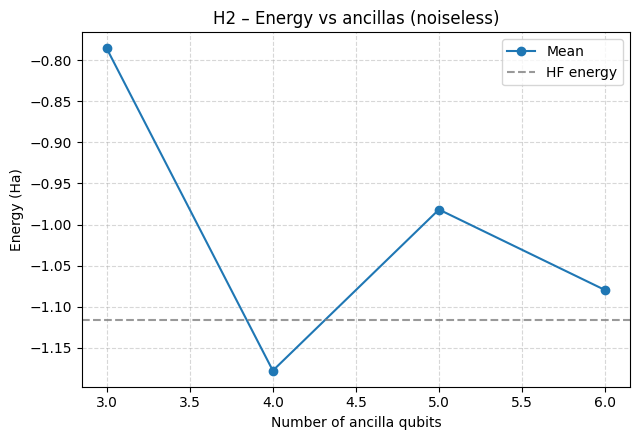

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/qpe/H2/sweep_energy_vs_ancillas_noiseless.png


In [5]:
# Sweep over number of ancilla qubits (noiseless)
anc_list = [3, 4, 5, 6]
energies = []

for n in anc_list:
    sig = signature_hash(molecule=molecule_name, n_ancilla=n, t=t_evol, shots=shots, noise=None, trotter_steps=trotter_steps)
    r = load_qpe_result(molecule_name, sig)
    if r is None:
        r = run_qpe(hamiltonian=H, hf_state=hf_state, n_ancilla=n, t=t_evol,
                    trotter_steps=trotter_steps, noise_params=None, shots=shots,
                    molecule_name=molecule_name)
        save_qpe_result(r)
    energies.append(r["energy"])

plot_qpe_sweep(
    anc_list,
    energies,
    molecule=molecule_name,
    sweep_label="Number of ancilla qubits",
    ylabel="Energy (Ha)",
    title="Energy vs ancillas (noiseless)",
    ref_value=result["hf_energy"],
    ref_label="HF energy",
    ancilla=None,
    noise_params=None,
    show=True,
    save=True,
)
